# Descripción del proyecto

Este proyecto tiene como objetivo retomar un experimento de prueba A/B iniciado por un equipo anterior de una tienda en línea internacional. El equipo, después de lanzar la prueba, decidió abandonar el proyecto para emprender un nuevo camino en Brasil Como resultado, dejaron solo las especificaciones técnicas y los resultados parciales de la prueba.

El desafío es tomar esos datos y continuar el análisis de la prueba A/B, ajustando lo necesario y evaluando los resultados obtenidos hasta el momento. Se busca determinar si los objetivos planteados fueron alcanzados y si las modificaciones implementadas tuvieron el impacto esperado. 


## Inicialización
En la primera parte de este trabajo se llevarán a cabo los siguientes procesos:
1. Cargar las librerías necesarias para el análisis.
2. Importar el conjunto de datos.
3. Revisar los datos para proceder a su limpieza y enriquecimiento, en caso de ser necesario.


In [1]:
import datetime as dt

import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
import scipy as stats

from pandas import to_numeric
from scipy.stats import norm
import plotly.graph_objects as go

In [2]:
#cargar datos

m_events = pd.read_csv("ab_project_marketing_events_us.csv")
f_events = pd.read_csv("final_ab_events_upd_us.csv")
new_users = pd.read_csv("final_ab_new_users_upd_us.csv")
participants = pd.read_csv("final_ab_participants_upd_us.csv")

In [3]:
#crear función para exploración de los datos 
def eda(df):
    print(df.head())
    print()
    print(df.info()) 
    print()
    print(df.describe())
    print()
    
    print("Duplicados:")
    print(df.duplicated().sum())
    print()
    print("Ausentes:")
    print(df.isna().sum())     

In [4]:
#revisar los datos de cada tabla

eda(m_events)

                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None

                            name regions    start_dt   finish_dt
count       

In [5]:
print(m_events['name'].unique())

['Christmas&New Year Promo' "St. Valentine's Day Giveaway"
 "St. Patric's Day Promo" 'Easter Promo' '4th of July Promo'
 'Black Friday Ads Campaign' 'Chinese New Year Promo'
 'Labor day (May 1st) Ads Campaign' "International Women's Day Promo"
 'Victory Day CIS (May 9th) Event' 'CIS New Year Gift Lottery'
 'Dragon Boat Festival Giveaway' "Single's Day Gift Promo"
 'Chinese Moon Festival']


In [6]:
print(m_events['regions'].unique())

['EU, N.America' 'EU, CIS, APAC, N.America' 'N.America' 'APAC'
 'EU, CIS, APAC' 'CIS']


In [7]:
eda(f_events)

            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None

            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000

Duplicados:
0

Ausentes:
user_i

In [8]:
#revisar cantidad de eventos purchase
print(len(f_events.query("event_name == 'purchase'")))

60314


In [9]:
#encontrar nombre de los eventos 
print(f_events['event_name'].unique())

['purchase' 'product_cart' 'product_page' 'login']


In [10]:
eda(new_users)

            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     8F04273BB2860229  2020-12-21     EU  Android
freq                   1        6077  43396    26159

Duplicados:
0

Ausentes:
us

In [11]:
print(new_users['user_id'].duplicated().sum())

0


In [12]:
#encontrar equipos de los usuarios 

print(new_users['device'].unique())

['PC' 'Android' 'iPhone' 'Mac']


In [13]:
eda(participants)

            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     FABB6D49B11E673F      A  interface_eu_test
freq                   2   8214              10850

Duplicados:
0

Ausentes:
user_id    0
group      0
ab_test    0
dtype: int64


In [14]:
#revisar usuarios duplicados
print(participants['user_id'].duplicated().sum())

887


In [15]:
#revisar par usuario-grupo duplicados
print(participants[['user_id', 'group']].duplicated().sum())

446


In [16]:
#revisar grupos duplicados par usuario-grupo duplicado
user_group_dup = participants[['user_id', 'group']].duplicated()

print(participants[user_group_dup]['group'].value_counts())

group
A    340
B    106
Name: count, dtype: int64


### Resultados Inicialización 

Se crea una función para automatizar la revisión de los datos y, al aplicarla a los distintos DataFrames, se obtienen los siguientes resultados:

1. **Tabla `m_events`**  
   - Columnas: 4  
   - Filas: 14  
   - Sin datos nulos ni duplicados.  
   - Columnas con fechas son de tipo objeto.

2. **Tabla `f_events`**  
   - Columnas: 4  
   - Filas: 423,761  
   - Datos nulos: 363,447 en la columna *detail* (esperado, ya que es exclusiva para eventos de compra y detalla el monto pagado).  
   - Sin duplicados.  
   - Columnas con fechas son de tipo objeto.

3. **DataFrame `new_user`**  
   - Columnas: 4  
   - Filas: 58,703  
   - Sin valores nulos ni duplicados. 
    - Columnas con fechas son de tipo objeto.

4. **Tabla `participants`**  
   - Columnas: 3  
   - Filas: 14,525  
   - Sin datos nulos.  
   - Sin filas completamente duplicadas, aunque la combinación *user_id* - *group* se repite, ya que representa los eventos en los  que participó cada usuario, que pueden repetirse al avanzar en la cadena de compra.  
   - 13638 personas en total participan en la prueba.

## Preprocesamiento de datos 
En esta fase se convertirán a tipo de dato fecha aquellas columnas de las tablas a usar. Además, se creará un solo df con el cual poder trabajar en el análisis. 

In [17]:
#modificar tipo de datos columna 'event_dt' de f_events
f_events['event_dt'] = pd.to_datetime(f_events['event_dt'])

In [18]:
#crear columnas de fecha y hora
f_events['date'] = f_events['event_dt'].dt.date
f_events['time'] = f_events['event_dt'].dt.time 

In [19]:
#modificar datos columna 'first_date' de la tabla new_users 
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [20]:
#unir tablas new_users y participants

merged_df_u_p= new_users.merge(participants, on='user_id', how='inner')
print(merged_df_u_p.head)

<bound method NDFrame.head of                 user_id first_date region   device group  \
0      D72A72121175D8BE 2020-12-07     EU       PC     A   
1      2E1BF1D4C37EA01F 2020-12-07     EU       PC     A   
2      50734A22C0C63768 2020-12-07     EU   iPhone     B   
3      5BE017E9C8CC42F8 2020-12-07     EU  Android     B   
4      96F27A054B191457 2020-12-07     EU   iPhone     B   
...                 ...        ...    ...      ...   ...   
14520  0416B34D35C8C8B8 2020-12-20     EU  Android     A   
14521  27007FC1A9B62FC5 2020-12-20     EU   iPhone     B   
14522  75F25D4DADA37ABB 2020-12-20     EU  Android     B   
14523  2C29721DDDA76B2A 2020-12-20     EU   iPhone     B   
14524  1C7D23927835213F 2020-12-20     EU   iPhone     B   

                       ab_test  
0      recommender_system_test  
1            interface_eu_test  
2            interface_eu_test  
3            interface_eu_test  
4            interface_eu_test  
...                        ...  
14520  recommender

In [21]:
#agregar tabla eventos
full_merged_df = merged_df_u_p.merge(f_events, on='user_id', how='inner')

In [22]:
#filtrar new_users por región 
new_users_not_eu = list(new_users.query("region != 'EU'")['user_id'])

In [23]:
#filtrar 'full_merged_df' por usuario y tipo de prueba

filtered_merged_df = full_merged_df.query("user_id not in @new_users_not_eu & ab_test == 'recommender_system_test'")
filtered_merged_df.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,date,time
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN,2020-12-07,21:52:10
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN,2020-12-07,21:52:07
42,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN,2020-12-07,15:32:54
43,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN,2020-12-08,08:29:31
44,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN,2020-12-10,18:18:27


In [24]:
#eliminar NaN en columna details 
filtered_merged_df['details'] = filtered_merged_df['details'].fillna(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14896\3951381421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['details'] = filtered_merged_df['details'].fillna(0)


In [25]:
#crear columnas con diferencia entre el ingreso y los eventos 
filtered_merged_df['threshold'] = pd.to_datetime(filtered_merged_df['date']) - filtered_merged_df['first_date']

#convertir columna threshold a numérica
filtered_merged_df['threshold'] = filtered_merged_df['threshold'].dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14896\4091926004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['threshold'] = pd.to_datetime(filtered_merged_df['date']) - filtered_merged_df['first_date']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14896\4091926004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['threshold'] = filtered_merged_df['threshold'].dt.days


In [26]:
#revisar si hay participantes que han sido parte por más de 14 días 
filtered_merged_df['threshold'].max()

np.int64(23)

In [27]:
#eliminar aquellos datos en que hayan pasado más de 14 días desde la fecha de inscripción 
merged_df_14 = filtered_merged_df.query("threshold <= 14")

In [28]:
#calcular total de participantes

total_participants = merged_df_14['user_id'].nunique()
print(f"El número de participantes final es de: {total_participants}" )

El número de participantes final es de: 3481


### Resultados del preprocesamiento  
En esta etapa se realizaron las siguientes transformaciones y ajustes para preparar los datos para el análisis:  

1. **Transformación de columnas de tipo fecha:**  
   Se ajustaron las columnas con formato de fecha en las tablas que serán utilizadas en el siguiente análisis.  

2. **Unión de tablas:**  
   Se combinaron las tablas `f_events`, `new_users` y `participants` para consolidar todos los datos relevantes y trabajar de manera más eficiente.  

3. **Filtrado de datos:**  
   Los datos se filtraron según los criterios de región, tipo de experimento y otros parámetros necesarios para el análisis.  

4. **Manejo de valores faltantes:**  
   Los valores `NaN` de la columna *details* se completaron con 0, ya que estos no representan eventos de compra.  

5. **Eliminación de interacciones fuera del rango:**  
   Se excluyeron las interacciones que exceden los 14 días, de acuerdo con el límite de efectividad establecido en los objetivos de la prueba A/B.  

6. **Participantes totales:**  
   Al realizar todas las filtraciones correspondientes, el número de usuarios que participaron en la prueba fue de 3.481. Casi un 42% menos de lo esperado.  

Estas acciones aseguran que los datos estén limpios y alineados con los requerimientos del análisis posterior.


## Análisis exploratorio de datos 

In [29]:
#encontrar fechas de ingreso nuevos usuarios
print(new_users['first_date'].min())
print(print(new_users['first_date'].max())) 

2020-12-07 00:00:00
2020-12-23 00:00:00
None


In [30]:
#encontrar número de participantes totales
merged_df_14['user_id'].nunique()

3481

In [31]:
#encontrar cantidad de usuario por grupo 

a_group = merged_df_14.query("group == 'A'")
b_group = merged_df_14.query("group == 'B'")
print("Participantes grupo A:")
print(a_group['user_id'].nunique())
print()
print("Participantes grupo B:")
print(b_group['user_id'].nunique())

Participantes grupo A:
2604

Participantes grupo B:
877


In [32]:
#encontrar usuarios en múltiples grupos 
users_in_multiple_groups = merged_df_14.groupby('user_id')['group'].nunique()
print(users_in_multiple_groups[users_in_multiple_groups > 1])

Series([], Name: group, dtype: int64)


In [33]:
#calcular cantidad de eventos por usuario

events_per_user= (merged_df_14
                  .groupby('user_id')['event_name']
                  .count()
                  .reset_index())

events_per_user.columns = ['usuario', 'num_eventos']

print(events_per_user.head())

            usuario  num_eventos
0  001064FEAAB631A1            6
1  0010A1C096941592           12
2  00341D8401F0F665            2
3  003DF44D7589BBD4           15
4  00505E15A9D81546            5


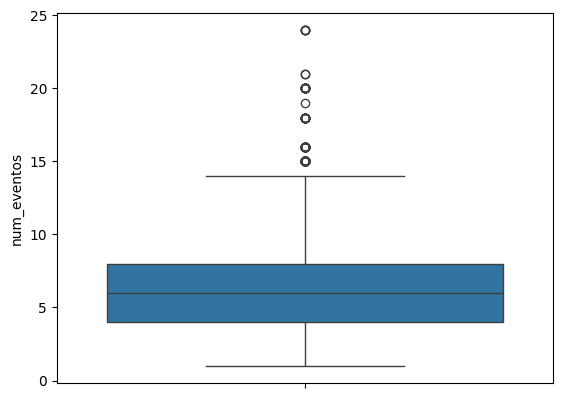

In [34]:
#revisar outliers de eventos por usuario

sns.boxplot(events_per_user['num_eventos'])

plt.show()

In [35]:
#Calcular eventos promedio por usuario
print('Media,', events_per_user['num_eventos'].mean().round(2))

#Calcular mediana
print('Mediana:', events_per_user['num_eventos'].median())

#Calcular moda
print('Moda:', events_per_user['num_eventos'].mode())

Media, 6.37
Mediana: 6.0
Moda: 0    6
Name: num_eventos, dtype: int64


In [36]:
#calcular límite superior outliers
q1 = events_per_user['num_eventos'].quantile(0.25)
q3 = events_per_user['num_eventos'].quantile(0.75)

iqr = q3 - q1

outliers_sup = q3 + 1.5 * iqr

print(f'El límite superior de outliers es: {outliers_sup}')

El límite superior de outliers es: 14.0


In [37]:
#calcular cantidad de usuarios con num_eventos igual o mayor a 14
outliers_users = list(events_per_user.query("num_eventos >= 14")['usuario'])

print(len(outliers_users))

157


In [38]:
#filtrar outliers de merged_df_14 

no_outliers_df = merged_df_14.query("user_id not in @outliers_users")

In [39]:
#calcular nuevamente participantes de cada grupo sin outliers 

a_group_no_outliers = no_outliers_df.query("group == 'A'")
b_group_no_outliers = no_outliers_df.query("group == 'B'")
print("Participantes grupo A:")
print(a_group_no_outliers['user_id'].nunique())
print("Antes:", a_group['user_id'].nunique())
print()
print("Participantes grupo B:")
print(b_group_no_outliers['user_id'].nunique())
print("Antes:", b_group['user_id'].nunique())

Participantes grupo A:
2465
Antes: 2604

Participantes grupo B:
859
Antes: 877


In [40]:
#calcular eventos por usuario del grupo A
events_per_user_a= (no_outliers_df
                    .query("group == 'A'")
                    .groupby('user_id')['event_name']
                    .count()
                    .reset_index())

events_per_user_a.columns = ['usuario', 'num_eventos']

print(events_per_user_a.head())

            usuario  num_eventos
0  0010A1C096941592           12
1  00341D8401F0F665            2
2  00505E15A9D81546            5
3  006E3E4E232CE760            6
4  00A52DCF85F1BE03            2


In [41]:
#Calcular eventos promedio por usuario grupo A
print('Media A,', events_per_user_a['num_eventos'].mean().round(2))

#Calcular mediana
print('Mediana A:', events_per_user_a['num_eventos'].median())

#Calcular moda
print('Moda A:', events_per_user_a['num_eventos'].mode())

Media A, 6.13
Mediana A: 6.0
Moda A: 0    6
Name: num_eventos, dtype: int64


In [42]:
#calcular eventos por usuario del grupo A
events_per_user_b= (no_outliers_df
                    .query("group == 'B'")
                    .groupby('user_id')['event_name']
                    .count()
                    .reset_index())

events_per_user_b.columns = ['usuario', 'num_eventos']

print(events_per_user_b.head())

            usuario  num_eventos
0  001064FEAAB631A1            6
1  005E096DBD379BCF            4
2  015D1E3BB893349D            6
3  015FF3EC72C1F4F6            2
4  01B0B891CA513468           12


In [43]:
#Calcular eventos promedio por usuario grupo A
print('Media B,', events_per_user_b['num_eventos'].mean().round(2))

#Calcular mediana
print('Mediana B:', events_per_user_b['num_eventos'].median())

#Calcular moda
print('Moda B:', events_per_user_b['num_eventos'].mode())

Media B, 5.19
Mediana B: 4.0
Moda B: 0    6
Name: num_eventos, dtype: int64


In [44]:
#revisar frecuencia de cada evento y usuarios participantes para el total de personas

ab_events_freq = (no_outliers_df.groupby('event_name').agg({'date': 'count', 'user_id': pd.Series.nunique})
                             .reset_index())
                             #.sort_values(by='user_id', ascending=False)

ab_events_freq.columns = ['evento', 'num_ocurrencias', 'num_usuarios']
ab_events_freq['%_usuarios'] = (ab_events_freq['num_usuarios'] / ab_events_freq['num_ocurrencias']) * 100

#reordenar ab_events_freq por etapa del embudo
ab_events_freq = ab_events_freq.reindex([0, 2, 1, 3])


print("Embudo grupos A y B:")
print()
print(ab_events_freq)

Embudo grupos A y B:

         evento  num_ocurrencias  num_usuarios  %_usuarios
0         login             9237          3323   35.974884
2  product_page             5465          2031   37.163769
1  product_cart             2398           914   38.115096
3      purchase             2477           968   39.079532


In [45]:
#realizar embudo para ab_events_freq

ab_events_funnel = ab_events_freq.query('evento != "login"')

fig = go.Figure(go.Funnel(
   y=ab_events_funnel['evento'],
    x=ab_events_funnel['num_usuarios']
))

# Mostrar el gráfico
fig.show()

In [46]:
#revisar frecuencia de cada evento y usuarios participantes para el grupo A

a_events_freq = (no_outliers_df.query("group == 'A'")
                            .groupby('event_name').agg({'date': 'count', 'user_id': pd.Series.nunique})
                             .reset_index())
                             #.sort_values(by='user_id', ascending=False)

a_events_freq.columns = ['evento', 'num_ocurrencias', 'num_usuarios']
a_events_freq['%_usuarios'] = (a_events_freq['num_usuarios'] / a_events_freq['num_ocurrencias']) * 100

#reordenar ab_events_freq por etapa del embudo
a_events_freq = a_events_freq.reindex([0, 2, 1, 3])

print("Embudo grupo A:")
print()
print(a_events_freq)

Embudo grupo A:

         evento  num_ocurrencias  num_usuarios  %_usuarios
0         login             7024          2465   35.093964
2  product_page             4316          1555   36.028730
1  product_cart             1840           682   37.065217
3      purchase             1937           734   37.893650


In [47]:
#realizar embudo para a_events_freq

a_events_funnel = a_events_freq.query('evento != "login"')

fig = go.Figure(go.Funnel(
   y=a_events_funnel['evento'],
    x=a_events_funnel['num_usuarios']
))

# Mostrar el gráfico
fig.show()

In [48]:
#revisar frecuencia de cada evento y usuarios participantes para el grupo B

b_events_freq = (no_outliers_df
                 .query("group == 'B'")
                 .groupby('event_name').agg({'date': 'count', 'user_id': pd.Series.nunique})
                 .reset_index())
                 #.sort_values(by='user_id', ascending=False)

b_events_freq.columns = ['evento', 'num_ocurrencias', 'num_usuarios']
b_events_freq['%_usuarios'] = (b_events_freq['num_usuarios'] / b_events_freq['num_ocurrencias']) * 100

#reordenar ab_events_freq por etapa del embudo
b_events_freq = b_events_freq.reindex([0, 2, 1, 3])

print("Embudo grupo B:")
print()
print(b_events_freq)

Embudo grupo B:

         evento  num_ocurrencias  num_usuarios  %_usuarios
0         login             2213           858   38.770899
2  product_page             1149           476   41.427328
1  product_cart              558           232   41.577061
3      purchase              540           234   43.333333


In [49]:
#realizar embudo para b_events_freq

b_events_funnel = b_events_freq.query('evento != "login"')

fig = go.Figure(go.Funnel(
   y=b_events_funnel['evento'],
    x=b_events_funnel['num_usuarios']
))

# Mostrar el gráfico
fig.show()

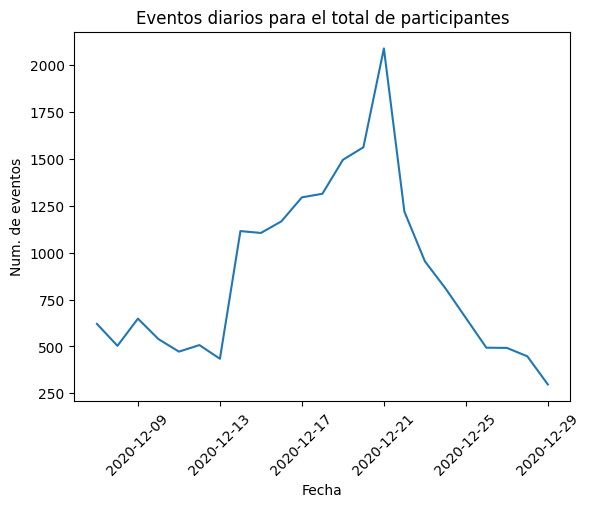

In [50]:
#distribución eventos por día grupos A y B 
events_per_day_ab = (no_outliers_df
                     .groupby("date")['event_name']
                     .count()
                     .reset_index())

events_per_day_ab.plot(x='date',
                       y='event_name',
                       legend=False)

plt.title("Eventos diarios para el total de participantes")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Num. de eventos")

plt.show()

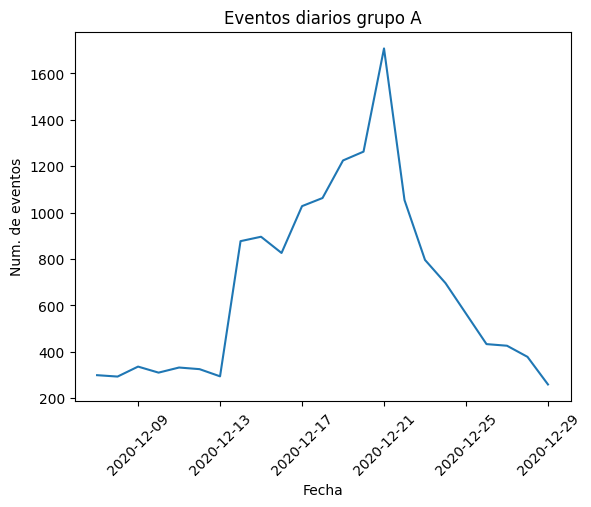

In [51]:
#distribución eventos por día grupo A 
events_per_day_a = (no_outliers_df
                     .query("group == 'A'")
                     .groupby("date")['event_name']
                     .count()
                     .reset_index())

events_per_day_a.plot(x='date',
                      y='event_name',
                      legend=False)

plt.title("Eventos diarios grupo A")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Num. de eventos")

plt.show()

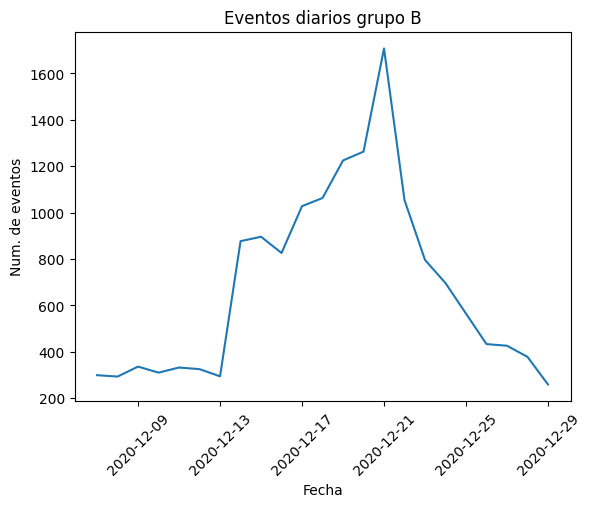

In [52]:
#distribución eventos por día grupo B 
events_per_day_b = (no_outliers_df
                     .query("group == 'A'")
                     .groupby("date")['event_name']
                     .count()
                     .reset_index())

events_per_day_b.plot(x='date',
                      y='event_name',
                      legend=False)

plt.title("Eventos diarios grupo B")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Num. de eventos")

plt.show()


### Resultado Análisis Exploratorio de Datos (EDA)

A partir del análisis exploratorio de datos, se identificaron los siguientes hallazgos:

1. **Fechas de finalización de admisión de nuevos usuarios:**  
   La fecha real en la que se dejó de admitir nuevos usuarios fue el **23 de diciembre de 2020**.

2. **Distribución de eventos en el tiempo:**  
   La distribución de eventos por fecha es similar en ambos grupos. Ambos comienzan y terminan con aproximadamente 300 eventos, alcanzando un pico de actividad en fechas cercanas a la Navidad.

3. **Exclusividad de los participantes por grupo:**  
   Ningún participante pertenece a ambos grupos del experimento, lo que asegura la independencia entre los grupos.

4. **Desbalance en el tamaño de los grupos:**  
   Existe un desbalance significativo en el número de usuarios, ya que los participantes del grupo A triplican a los del grupo B.

5. **Análisis de valores atípicos:**  
   - Los usuarios con 14 eventos o más fueron identificados como valores atípicos. Esto resultó en la eliminación de **157 participantes** para evitar alterar los valores promedio.  
   - Estadísticas clave por grupo:  
     - **Grupo A:** Media de 6.13 eventos por usuario, con una mediana y moda de 6.  
     - **Grupo B:** Media de 5.22 eventos por usuario, con una mediana de 4 y una moda de 6.  

6. **Embudo de conversión:**  
   Se analizaron embudos de conversión para evaluar la proporción de usuarios que realizan compras desde las distintas etapas. De forma preliminar, la tasa de conversión en relación al total de participantes en la primera etapa es similar en ambos grupos.

7. **Inconsistencias en los datos de eventos:**  
   Se detectó que los datos del evento *purchase_cart* son menores que los del evento final *purchase*, lo que sugiere que los datos están incompletos.

## Prueba AB
En esta última etapa del análisis se realizará la prueba estadística Z para comprobar que el sistema de recomendaciones implementado aumentó en al menos un 10% la conversión de compras.

### Comprobar diferencias estadísticas entre pruebas AB
Hipótesis nula: No hay una diferencia significativa en la tasa de conversión entre el grupo de control A y el grupo experimental B.

Hipótesis alternativa: Hay una diferencia significativa en la tasa de conversión entre el grupo de control A y el grupo experimental B.

In [53]:
#Comparar si hay una diferencia significativa entre ambas pruebas

# Datos de entrada
exitos1 = 1937  # Éxitos en el grupo control
usuarios1 = 2465  # Tamaño del grupo control
exitos2 = 540  # Éxitos en el grupo experimental
usuarios2 = 859  # Tamaño del grupo experimental
alpha = 0.05  # Nivel de significancia

# Proporción de éxitos en el grupo control
p1 = exitos1 / usuarios1

# Proporción de éxitos en el grupo experimental
p2 = exitos2 / usuarios2

# Proporción combinada
p_combinada = (exitos1 + exitos2) / (usuarios1 + usuarios2)

# Diferencia de proporciones entre las pruebas
dif_p = p1 - p2

# Calcular valor z
valor_z = dif_p / math.sqrt(p_combinada * (1 - p_combinada) * ((1 / usuarios1) + (1 / usuarios2)))

# Calcular valor p (prueba de dos colas)
valor_p = 2 * (1 - norm.cdf(abs(valor_z)))

if valor_p < alpha:
    print('Se rechaza la hipótesis nula. Hay una diferencia estadística significativa entre ambas pruebas.')
else:
    print('No se rechaza la hipótesis nula: no hay evidencia suficiente de una diferencia significativa.')

Se rechaza la hipótesis nula. Hay una diferencia estadística significativa entre ambas pruebas.


### Comprobar porcentaje de la diferencia entre las pruebas AB

Hipótesis nula: La introducción de un sistema de recomendaciones mejorado no incrementa en al menos un 10% las ventas de la tienda. 

Hipótesis nula: La introducción de un sistema de recomendaciones mejorado incrementa en al menos un 10% las ventas de la tienda. 


In [54]:
# Nivel crítico para α = 0.05 (prueba de una cola)
z_critico = norm.ppf(1 - alpha)

# Resultado
if valor_p > z_critico:
    print(f"Se rechaza la hipótesis nula: El aumento es significativo con Z = {valor_z:.2f}")
else:
    print(f"No se puede rechazar la hipótesis nula: Z = {valor_z:.2f}")

No se puede rechazar la hipótesis nula: Z = 9.10


## Conclusiones 

El objetivo de este proyecto fue retomar un experimento de pruebas A/B avanzado realizado por un equipo de analistas anterior. Para ello, se revisaron y ajustaron los datos según los requerimientos planteados por dicho equipo, así como lo indicado en la fase de inicialización y preprocesamiento. Esto permitió la estandarización de ciertos datos y la aplicación de los filtros correspondientes.

Al analizar los datos de la tabla *merged_df_14*, que ya estaban limpios y tratados, se reveló una desproporción significativa entre los grupos: el grupo de control era un **tercio mayor** que el grupo experimental. A pesar de este desbalance, los valores estadísticos y el comportamiento de las interacciones con la plataforma a lo largo del tiempo se mantuvieron consistentes.

Con base en esta disparidad en el tamaño de las muestras, se aplicó una prueba Z para evaluar las diferencias estadísticas entre ambos grupos y determinar si se había alcanzado el objetivo de incrementar las ventas en un **10% en 14 días** debido a la mejora en el sistema de recomendaciones del sitio web. Al calcular el valor Z, se ajustó la fórmula para calcular el **error estándar** debido al tamaño desigual de las muestras. 

El resultado de la prueba concluye que, efectivamente, se observó una mejora en la conversión de compras para el grupo B, pero el incremento estuvo cerca del **9%** y no alcanzó el **10%** planteado inicialmente.

### Recomendaciones

Dado que no se cumplen los estándares necesarios para evaluar los resultados con objetividad, se recomienda **repetir el experimento**. La muestra utilizada fue mucho menor de lo esperado, lo que dificulta asegurar que los cambios sean exclusivos de las modificaciones realizadas en la plataforma, o si la tasa de conversión más alta fue influenciada en gran medida por el evento de Navidad, que históricamente genera un mayor volumen de compras.

También es crucial que los grupos de control y experimental estén **proporcionalmente balanceados** para evitar sesgos en los resultados. Para mejorar la validez del experimento, se sugiere realizar una prueba **A/A/B** en lugar de la prueba A/B propuesta inicialmente. Esto implicaría la creación de tres grupos (control, experimental y un nuevo grupo de control) para una evaluación más exhaustiva y precisa.



